<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#212121;
           font-size:110%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#FFFFFF;">K-Means - Customer Segmentstion
</h2>
</div>    
</center>

Mall Customer Segmentation Data

<a id = 'toc'></a>
# Table of Contents

- ### [Calculus](#calculus)
- ### [K-Means (from scratch)](#kmeans_scratch)
- ### [Data](#data)
- ### [Exploratory Data Analysis](#eda)
- ### [K-Means Clustering (sklearn)](#kmeans)

<a id = 'calculus'></a>
<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#212121;
           font-size:110%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#FFFFFF;">Calculus
</h2>
</div>    
</center>

<center>
<div style="color:white;
           display:fill;
           border: 0px;
           border: 2px solid #AAA;
           font-size:110%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#212121;">K-Means
</h2>
</div>    
</center>

To get a better understanding of our future K-Means model, we need to find out how the algorithm works.

K-Means randomly (not always) selects data points in the data space represented by a chosen (also not always) number of clusters, also called "**centroids**".
- Data points in data space : $D = (x_{1}, ..., x_{n}), x_{i} \in \mathbb{R}^{d}$
- K-clusters with centers : $\mu_{1}, ..., \mu_{K} \in \mathbb{R}^{d}$

To measure the fit of a centroid we need the sum of the distances to a center.

$$L = \sum_{j = 1}^{K}\sum_{i: i \in j}\Vert x_{i} - \mu_{j}\Vert^{2} = \sum_{j = 1}^{K}\sum_{i = 1}^{N} a_{ij}\Vert x_{i} - \mu_{j}\Vert^{2}$$
- $x_{i}$ - data-point
- $\mu_{j}$ - centroid

The coefficient indicates whether the data point belongs to the cluster (j).

$$
a_{ij} = \left\{ \begin{array}{rcl}
1 & \mbox{for} & i \in j \\
0 & \mbox{for} & i \notin j \\
\end{array}\right.
$$

Now the algorithm tries to minimise a and mu by coordinate descent, alternately:
1. Choose optimal $a_{ij}$ for fixed $\mu_{j}$
2. Choose optimal $\mu_{j}$ for fixed $a_{ij}$

<left>
<div style="color:white;
           display:fill;
           border: 0px;
           border-bottom: 2px solid #AAA;
           font-size:80%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#212121;">Minimizing $a_{ij}$
</h2>
</div>    
</left>

$$
a_{ij} = \left\{ \begin{array}{rcl}
1 & k = \arg \min_{k'} \Vert x_{N} - \mu_{k'} \Vert^{2} \\
0 & \mbox{othrewise} \\
\end{array}\right.
$$

<left>
<div style="color:white;
           display:fill;
           border: 0px;
           border-bottom: 2px solid #AAA;
           font-size:80%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#212121;">Minimizing $\mu_{j}$
</h2>
</div>    
</left>

$$L = \sum_{j = 1}^{k}\sum_{i = 1}^{N} a_{ij} \underbrace{\Vert x_{i} - \mu_{j}\Vert^{2}}_{\Vert x_{i} - \mu_{j}\Vert^{T}\Vert x_{i} - \mu_{j}\Vert}$$

$$
\begin{aligned}
0 = \nabla_{\mu_{j}}L &= \sum_{i}a_{ij} \underbrace{\nabla \Vert x_{i} - \mu_{j} \Vert^{T}\Vert x_{i} - \mu_{j} \Vert}_{= \nabla ( x_{i}^{T}x_{i} - 2x_{i}^{T}\mu_{j} + \mu_{j}^{T}\mu_{j}) = -2x_{i} + 2\mu_{j}} \\
&= -2 \sum_{i}a_{ij}x_{i} + 2\mu_{j}\sum_{i}a_{ij} \\
&\rightarrow 2\mu_{j}\sum_{i}a_{ij} = 2 \sum_{i}a_{ij}x_{i} \\
&\rightarrow \mu_{j}\sum_{i}a_{ij} = \sum_{i}x_{i}a_{ij} \\
&\rightarrow \mu_{j} = \frac{\sum_{j = 1}^{K}x_{i}a_{ij}}{\sum_{i = 1}^{N}a_{ij}}
\end{aligned}
$$

<a id = 'kmeans_scratch'></a>
<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#212121;
           font-size:110%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#FFFFFF;">K-Means (from scratch)
</h2>
</div>    
</center>

In [12]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

In [13]:
# Plot the data points inside an existing figure
def plot_data(X, c=[1]*X.shape[0], mu=None, ax = None):
    if len(np.unique(c)) == 1:
        plt.plot(X[:, 0], X[:, 1], 'o')
    else:
        ix = np.where(c==1)
        ax.plot(X[ix,0], X[ix,1], 'o', 
                markerfacecolor='red')
        ax.plot(mu[0,0], mu[0,1], 'o', 
                markerfacecolor='red', 
                markersize=12)
        ix = np.where(c==0)
        ax.plot(X[ix,0], X[ix,1], 'o', 
                markerfacecolor='green')
        ax.plot(mu[1,0], mu[1,1], 'o', 
                markerfacecolor='green', 
                markersize=12)
    if mu is not None:
        plt.plot(mu[0, 0], mu[0, 1], 'o'
                , markerfacecolor = 'red', markersize = 12)
        plt.plot(mu[1, 0], mu[1, 1], 'o'
                , markerfacecolor = 'lightgreen', markersize = 12)

# Create a figure and plot the data points
def plot_figure(X, c=[1]*X.shape[0], mu=None):
    fig = plt.figure(figsize = (4,4))
    ax = fig.add_subplot(1, 1, 1)
    plot_data(X, c, mu, ax)
    plt.show()

In [14]:
centers = np.array([[1, 1]
                , [-1, -1]])
n_clusters = len(centers)

X, true_labels = make_blobs(n_samples = 5000
                            , centers = centers
                            , cluster_std = .5)

In [15]:
# Calculate the sum of squares distance between data points 
# and there centroids
def calculate_inertia(X, mu, labels):
    a0 = np.where(labels == 0)
    a1 = np.where(labels == 1)
    
    error_cluster_0 = np.sum(np.power(X[a0, :] - mu[0, :], 2))
    error_cluster_1 = np.sum(np.power(X[a1, :] - mu[1, :], 2))
    
    return error_cluster_0 + error_cluster_1

# Update the coefficient
def update_labels(X, mu):
    c = np.argmax(np.c_[np.sum(np.power(X - mu[0, :], 2), axis = 1)
                        , np.sum(np.power(X - mu[1, :], 2), axis = 1)], axis = 1)
    return c

# Update the mu for each cluster
def update_cluster_centers(X, c):
    idx_1 = np.where(c == 1)
    mu[0, :] = np.mean(X[idx_1, :], axis = 1)
    idx_0 = np.where(c == 0)
    mu[1, :] = np.mean(X[idx_0, :], axis = 1)
    return mu

In [16]:
k = 2
mu_origin = np.array([[2., -2.], [-1., 2.]])
mu = np.array([[2., -2.], [-1., 2.]])

n_iter = 10
inertia_list = []

for iteration in range(n_iter):
    c = update_labels(X, mu)
    mu = update_cluster_centers(X, c)
    inertia_list.append(calculate_inertia(X, mu, c))
    if len(inertia_list) > 1 and inertia_list[-1] == inertia_list[-2]:
        print('Early Stop: Centroides placed')
        break
    print(f'[ITER]: {iteration+1}/{n_iter}, [INERTIA]: {inertia_list[-1]}')

[ITER]: 1/10, [INERTIA]: 18514.76496657719
[ITER]: 2/10, [INERTIA]: 40854.26247995489
[ITER]: 3/10, [INERTIA]: 41873.596922381614
[ITER]: 4/10, [INERTIA]: 41874.89623670848
Early Stop: Centroides placed


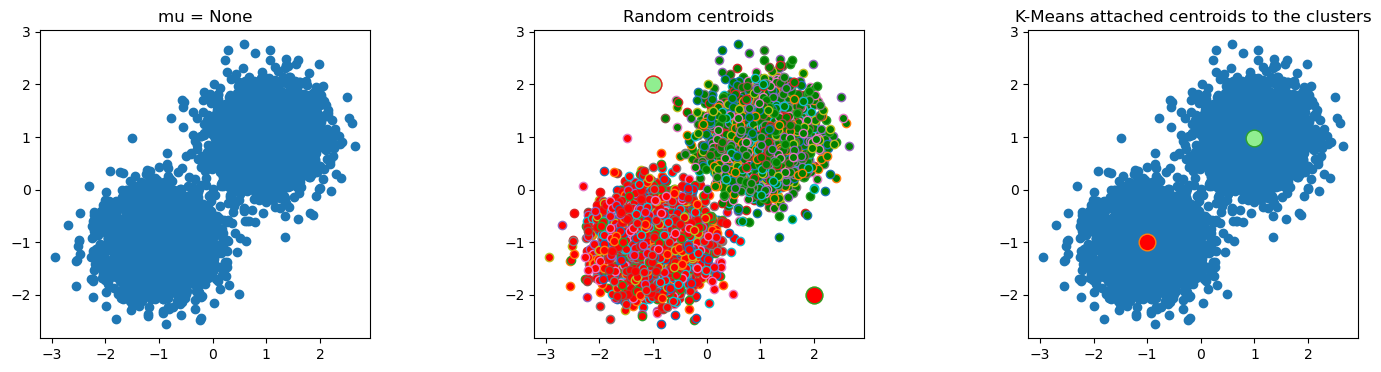

In [17]:
plt.figure(1, figsize = (17, 4))
n = 0
temp_list = []

for i in range(1, 4):
    ax = plt.subplot(1, 3, i)
    plt.subplots_adjust(hspace = .5, wspace = .5)
    if i == 1:
        plot_data(X)
        plt.title('mu = None')
    elif i == 2:
        plot_data(X, c=c, mu = mu_origin, ax = ax)
        plt.title('Random centroids')
    elif i == 3:
        plot_data(X, mu=mu)
        plt.title('K-Means attached centroids to the clusters')

<a id = 'data'></a>
<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#212121;
           font-size:110%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#FFFFFF;">Data
</h2>
</div>    
</center>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go

import statsmodels.formula.api as smf
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

import matplotlib.style as style
#style.available
plt.style.use('seaborn-v0_8-notebook')

## Dataset

Parsed data from customers' supermarket membership cards.

## Features
- **ID**
- **age**
- **gender**
- **annual income** - customers yearly income
- **spending score** - assign to the customer based on customer behavior and purchasing data

In [2]:
df = pd.read_csv('assets/clustering/Mall_Customers.csv')
df.columns = df.columns.str.lower()
df.head()

,customerid,gender,age,annual income (k$),spending score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   customerid              200 non-null    int64 
 1   gender                  200 non-null    object
 2   age                     200 non-null    int64 
 3   annual income (k$)      200 non-null    int64 
 4   spending score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,customerid,age,annual income (k$),spending score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


[UP](#toc)

<a id = 'eda'></a>
<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#212121;
           font-size:110%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#FFFFFF;">Exploratory Data Analysis
</h2>
</div>    
</center>

- [Target wise gender and age](#eda_target)
- [Distribution](#eda_distribution)
- [Relation between features](#eda_relation)

In [5]:
def range_step(start, end, step, num):
    temp_ = np.array(range(start, end+step, step))
    if float(num) > end:
        return 'x > ' + str(end)
    elif float(num) <= start:
        return 'x <= ' + str(start)
    else:
        return str(temp_[num > temp_][-1]) + ' < x <= ' + str(temp_[num <= temp_][0])

<a id = 'eda_target'></a>
<left>
<div style="color:white;
           display:fill;
           border: 0px;
           border-bottom: 2px solid #AAA;
           font-size:80%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#212121;">Target wise gender and age
</h2>
</div>    
</left>

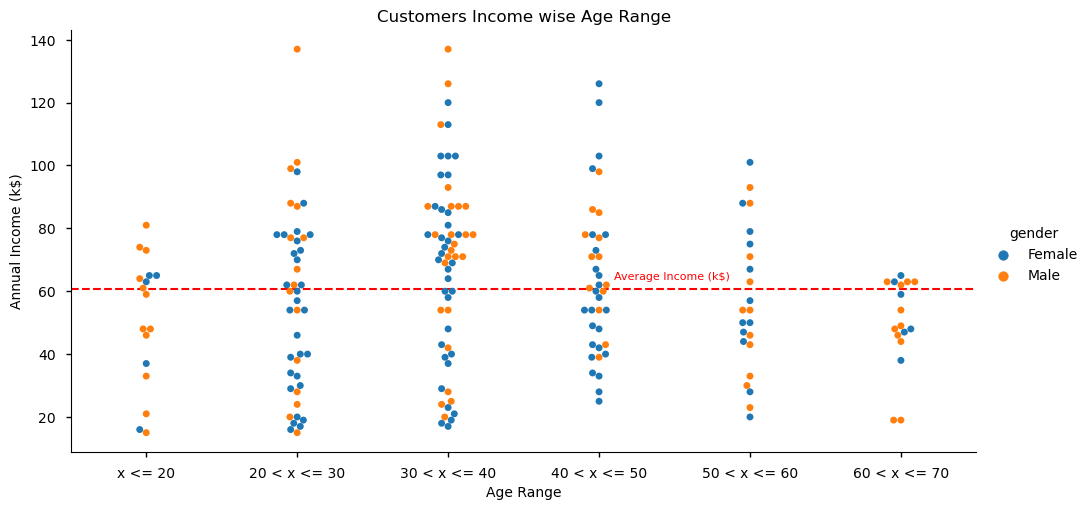

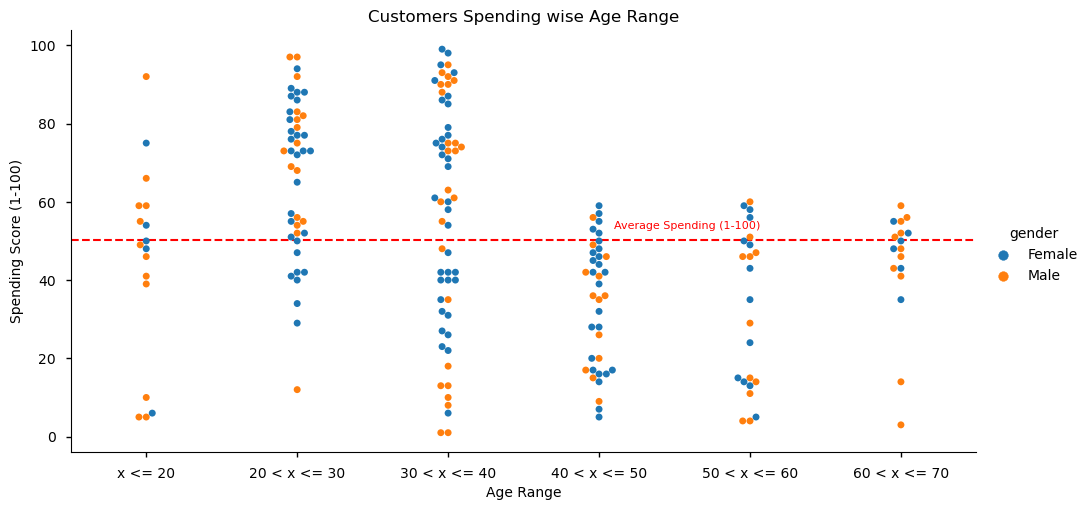

In [6]:
df['age_range'] = df['age'].apply(lambda x: range_step(20, 70, 10, x))

sns.catplot(data = df.sort_values('age'), x = 'age_range', y = 'annual income (k$)'
            , hue = 'gender', kind = 'swarm', aspect = 2, height = 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.axhline(df['annual income (k$)'].mean(), linestyle = '--', lw = 1.5, color = 'red')
plt.annotate(f'Average Income (k$)', (3.1, df['annual income (k$)'].mean()+3)
            , fontsize = 8, color = 'red')
plt.title('Customers Income wise Age Range')
plt.xlabel('Age Range')
plt.ylabel('Annual Income (k$)')


sns.catplot(data = df.sort_values('age'), x = 'age_range', y = 'spending score (1-100)'
            , hue = 'gender', kind = 'swarm', aspect = 2, height = 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.axhline(df['spending score (1-100)'].mean(), linestyle = '--', lw = 1.5, color = 'red')
plt.annotate(f'Average Spending (1-100)', (3.1, df['spending score (1-100)'].mean()+3)
            , fontsize = 8, color = 'red')
plt.title('Customers Spending wise Age Range')
plt.xlabel('Age Range')
plt.ylabel('Spending Score (1-100)')
plt.show()

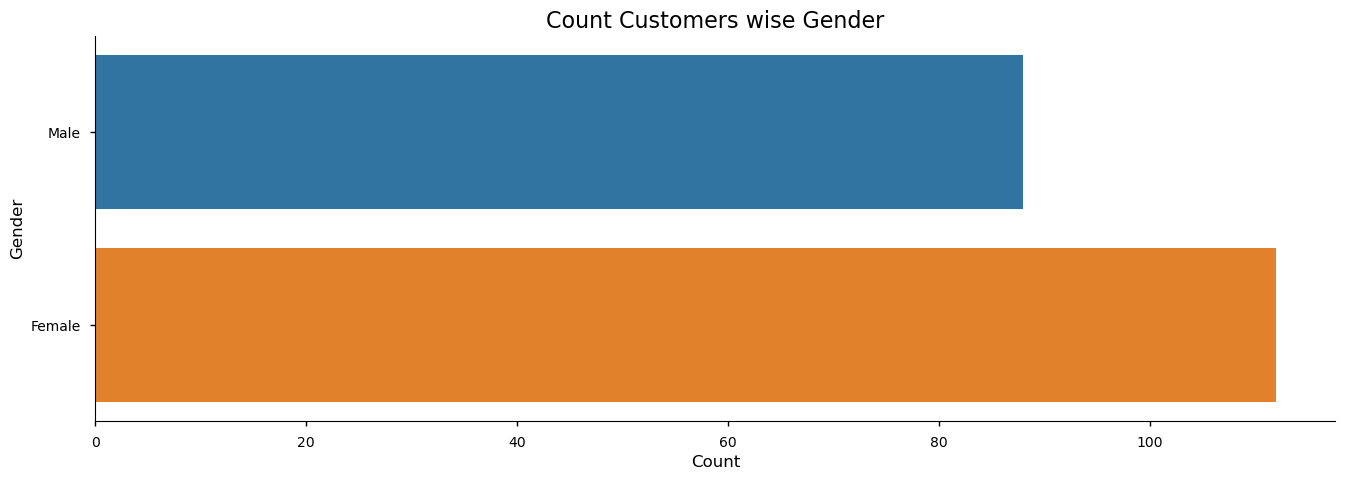

In [7]:
plt.figure(1, figsize = (16, 5))
sns.countplot(data = df, y = 'gender')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Count Customers wise Gender', fontsize = 16)
plt.xlabel('Count', fontsize = 12)
plt.ylabel('Gender', fontsize = 12)
plt.show()

<div class = 'alert alert-info alert-block'>
    <b>Interpretation:</b>  The range of annual incomes appears balanced enough to avoid problems caused by unbalanced gender data. While there seems to be more interest in the spending score among the younger generation, it appears to be higher than expected.
</div>

<a id = 'eda_distribution'></a>
<left>
<div style="color:white;
           display:fill;
           border: 0px;
           border-bottom: 2px solid #AAA;
           font-size:80%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#212121;">Distribution
</h2>
</div>    
</left>

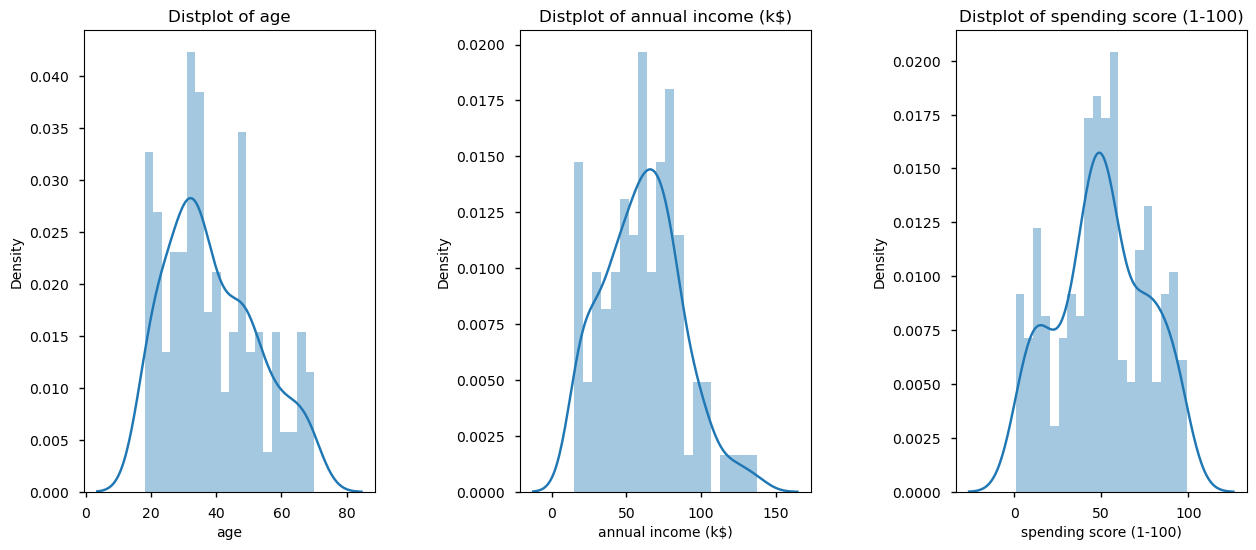

In [8]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['age', 'annual income (k$)', 'spending score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

<div class = 'alert alert-info alert-block'>
    <b>Interpretation:</b>  Now we can clearly see that the age group between 20 and 40 is higher, that's our target group (more customers, better spending score, a higher income).
</div>

<a id = 'eda_relation'></a>
<left>
<div style="color:white;
           display:fill;
           border: 0px;
           border-bottom: 2px solid #AAA;
           font-size:80%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#212121;">Relation between features
</h2>
</div>    
</left>

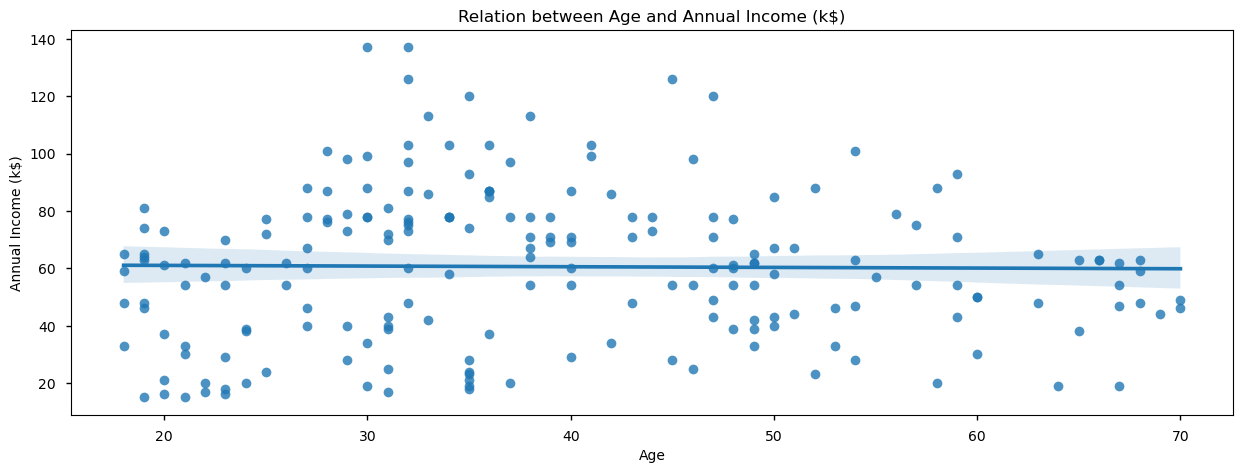

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.03044
Date:                Fri, 16 Feb 2024   Prob (F-statistic):              0.862
Time:                        11:31:10   Log-Likelihood:                -810.64
No. Observations:                 200   AIC:                             1625.
Df Residuals:                     198   BIC:                             1632.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        39.2493      2.494     15.739

In [9]:
plt.subplots(figsize = (15, 5))
sns.regplot(data = df, x = 'age', y = 'annual income (k$)')
plt.title('Relation between Age and Annual Income (k$)')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

df['annual_income'] = df['annual income (k$)']

m1 = smf.ols('age ~ annual_income', data = df)
fitted = m1.fit()
print(fitted.summary())

df.drop(columns = 'annual_income', axis = 1, inplace = True)

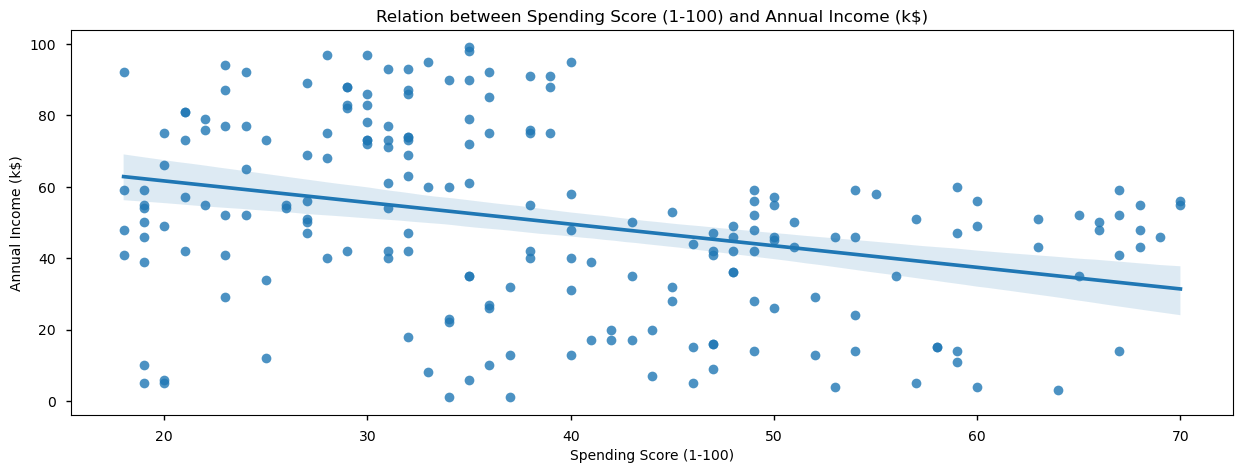

                            OLS Regression Results                            
Dep. Variable:         spending_score   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.01942
Date:                Fri, 16 Feb 2024   Prob (F-statistic):              0.889
Time:                        11:31:10   Log-Likelihood:                -933.53
No. Observations:                 200   AIC:                             1871.
Df Residuals:                     198   BIC:                             1878.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        49.6104      4.610     10.761

In [10]:
plt.subplots(figsize = (15, 5))
sns.regplot(data = df, x = 'age', y = 'spending score (1-100)')
plt.title('Relation between Spending Score (1-100) and Annual Income (k$)')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.show()

df['spending_score'] = df['spending score (1-100)']
df['annual_income'] = df['annual income (k$)']

m1 = smf.ols('spending_score ~ annual_income', data = df)
fitted = m1.fit()
print(fitted.summary())

df.drop(columns = ['spending_score', 'annual_income'], axis = 1, inplace = True)

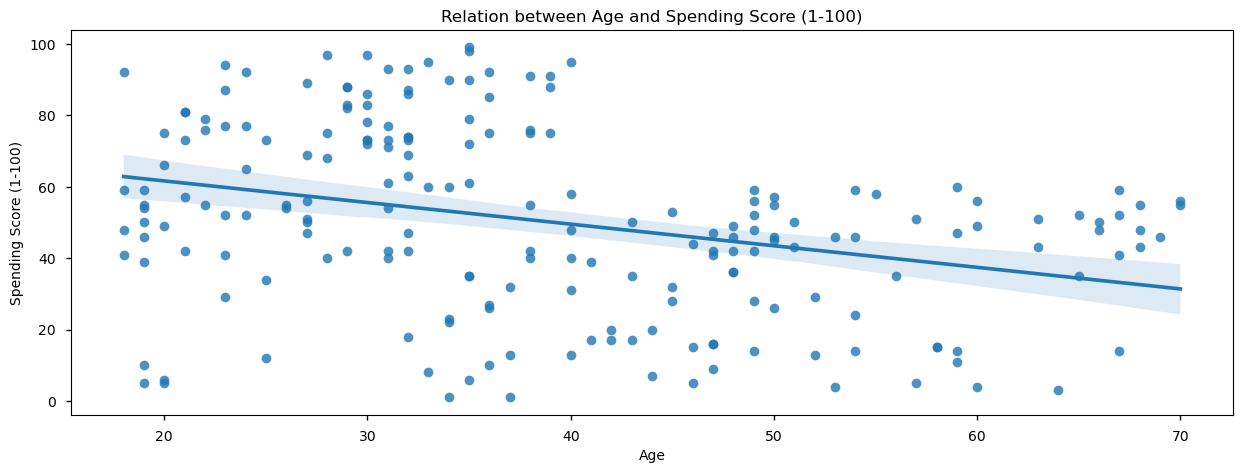

                            OLS Regression Results                            
Dep. Variable:         spending_score   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     23.74
Date:                Fri, 16 Feb 2024   Prob (F-statistic):           2.25e-06
Time:                        11:31:11   Log-Likelihood:                -922.22
No. Observations:                 200   AIC:                             1848.
Df Residuals:                     198   BIC:                             1855.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     73.7012      5.124     14.384      0.0

In [11]:
plt.subplots(figsize = (15, 5))
sns.regplot(data = df, x = 'age', y = 'spending score (1-100)')
plt.title('Relation between Age and Spending Score (1-100)')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

df['spending_score'] = df['spending score (1-100)']

m1 = smf.ols('spending_score ~ age', data = df)
fitted = m1.fit()
print(fitted.summary())

df.drop(columns = 'spending_score', axis = 1, inplace = True)

<div class = 'alert alert-info alert-block'>
    <b>Interpretation:</b>

**Variability at each point:** 60%. - This means that the expenditure score decreases as the availability of age increases.

**The coefficient of determination** tells us about the reliability of the "influence" of the independent variable (age) on the dependent variable (spending score).

**The T-criterion (its p-value)** indicates the statistical significance of the variable. It is also a test of the null hypothesis of equality b1 (slope) = 0. Since the probability is lower than our critical level of significance (alpha = 0.05), we reject the null hypothesis in favour of the alternative hypothesis.

**F-value** - obtained by applying the analysis of variance to test the global test that our model allows us to explain the behaviour of the dependent variable.
</div>

[UP](#toc)

<a id = 'kmeans'></a>
<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#212121;
           font-size:110%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#FFFFFF;">Means Clustering (sklearn)
</h2>
</div>    
</center>

- [Segmentation: Age and Spending Score](#kmeans_age_spending)
- [Segmentation: Spending Score and Annual Income](#kmeans_spending_annual)
- [Segmentation: Age, Spending Score and Annual Income](#kmeans_age_spending_annual)

<a id = 'kmeans_age_spending'></a>
<left>
<div style="color:white;
           display:fill;
           border: 0px;
           border-bottom: 2px solid #AAA;
           font-size:80%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#212121;">Segmentation: Age and Spending Score
</h2>
</div>    
</left>

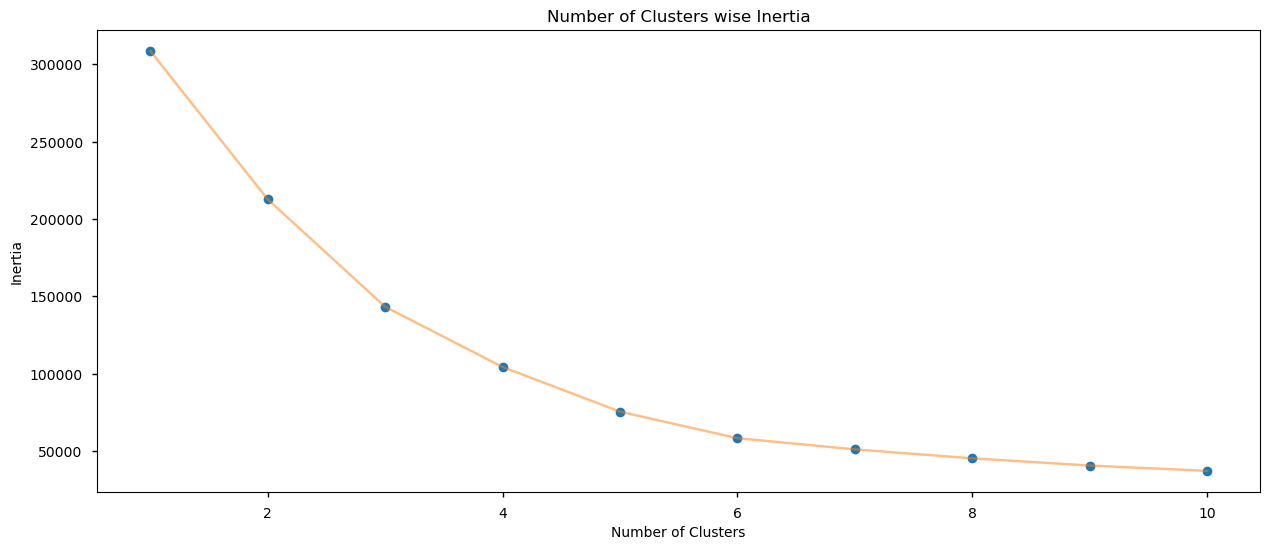

In [383]:
X1 = df[['age' , 'spending score (1-100)']].iloc[: , :].values

inertia = []

for n in range(1 , 11):
    algorithm = KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan')
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)
    
plt.figure(1, figsize = (15, 6))
plt.plot(np.arange(1, 11), inertia_list, 'o')
plt.plot(np.arange(1, 11), inertia_list, '-', alpha = .5)
plt.title('Number of Clusters wise Inertia')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

<div class = 'alert alert-info alert-block'>
    <b>Interpretation:</b> Using the Elbow method we will choose the optimal number of clusters.
</div>

In [384]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', n_init = 10, max_iter = 300
               , tol = .0001, random_state = 11, algorithm = 'elkan')
kmeans.fit(X1)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [385]:
h = .02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

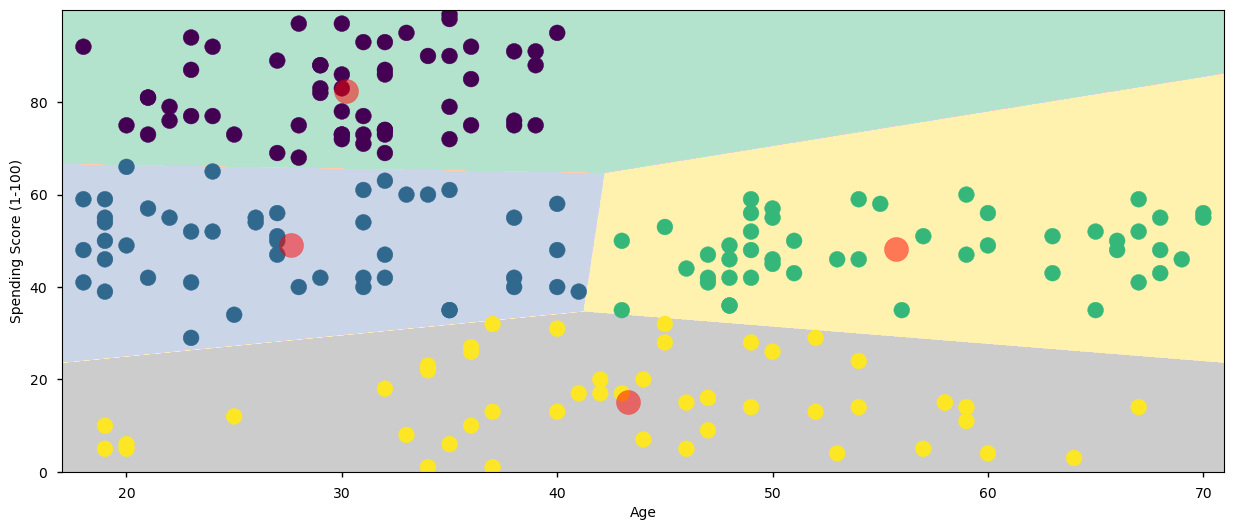

In [386]:
plt.figure(figsize = (15, 6))
plt.clf()
plt.imshow(z, extent = (xx.min(), xx.max(), yy.min(), yy.max())
          , cmap = plt.cm.Pastel2, aspect = 'auto', origin = 'lower')
plt.scatter(data = df, x = 'age', y = 'spending score (1-100)',
           c = labels, s = 130)
plt.scatter(x = centroids[:, 0], y = centroids[:, 1], s = 300, c = 'red', alpha = .5)
plt.ylabel('Spending Score (1-100)')
plt.xlabel('Age')
plt.show()

[UP](#toc)

<a id = 'kmeans_spending_annual'></a>
<left>
<div style="color:white;
           display:fill;
           border: 0px;
           border-bottom: 2px solid #AAA;
           font-size:80%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#212121;">Segmentation: Spending Score and Annual Income
</h2>
</div>    
</left>

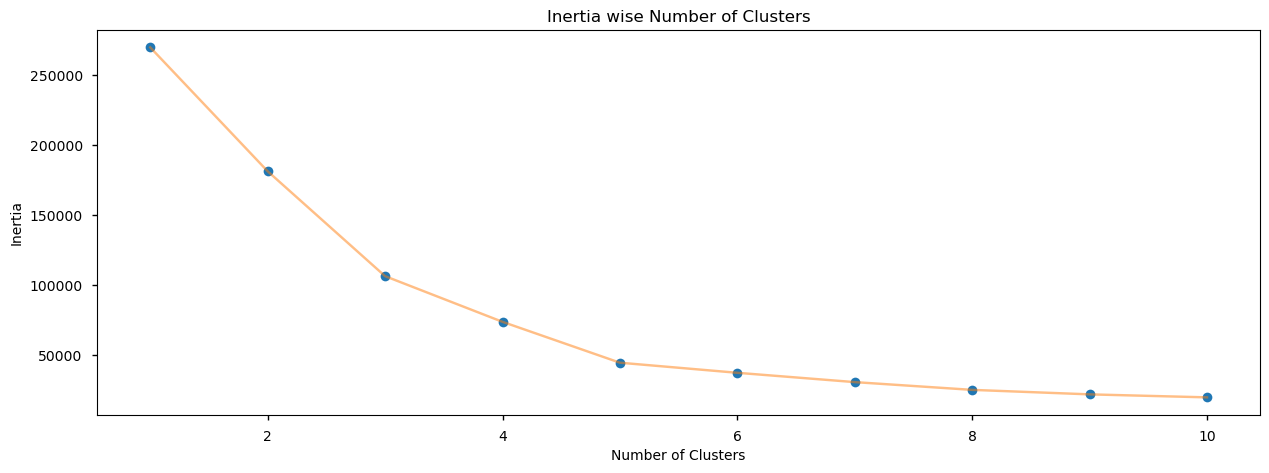

In [387]:
X2 = df[['spending score (1-100)', 'annual income (k$)']].values
inertia_list = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, init = 'k-means++'
                   , algorithm = 'elkan', random_state = 11)
    kmeans.fit(X2)
    inertia_list.append(kmeans.inertia_)
    
plt.figure(figsize = (15, 5))
plt.plot(np.arange(1, 11), inertia_list, 'o')
plt.plot(np.arange(1, 11), inertia_list, '-', alpha = .5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Inertia wise Number of Clusters')
plt.show()

In [388]:
kmeans = KMeans(n_clusters = 5, max_iter = 300, init = 'k-means++', n_init = 10
                , algorithm = 'elkan', random_state = 11)
kmeans.fit(X2)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [389]:
h = .05
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

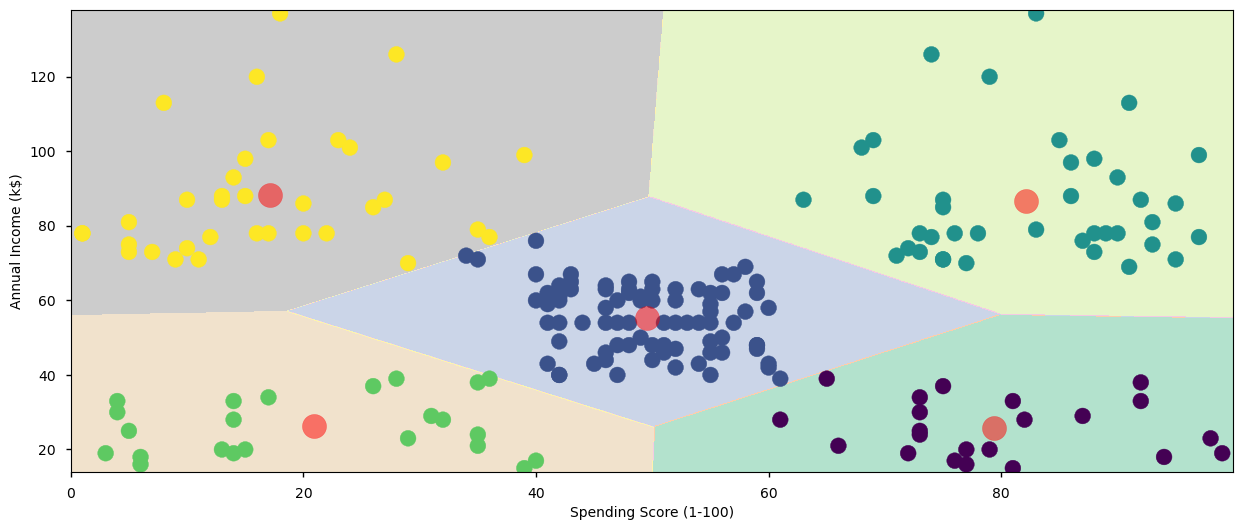

In [390]:
plt.figure(figsize = (15, 6))
plt.clf()
plt.imshow(z, extent = (xx.min(), xx.max(), yy.min(), yy.max())
          , cmap = plt.cm.Pastel2, aspect = 'auto', origin = 'lower')
plt.scatter(data = df, x = 'spending score (1-100)', y = 'annual income (k$)'
           ,c = labels, s = 130)
plt.scatter(x = centroids[:, 0], y = centroids[:, 1], s = 300, alpha = .5, color = 'red')
plt.ylabel('Annual Income (k$)')
plt.xlabel('Spending Score (1-100)')
plt.show()

[UP](#toc)

<a id = 'kmeans_age_spending_annual'></a>
<left>
<div style="color:white;
           display:fill;
           border: 0px;
           border-bottom: 2px solid #AAA;
           font-size:80%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#212121;">Segmentation: Age, Spending Score and Annual Income
</h2>
</div>    
</left>

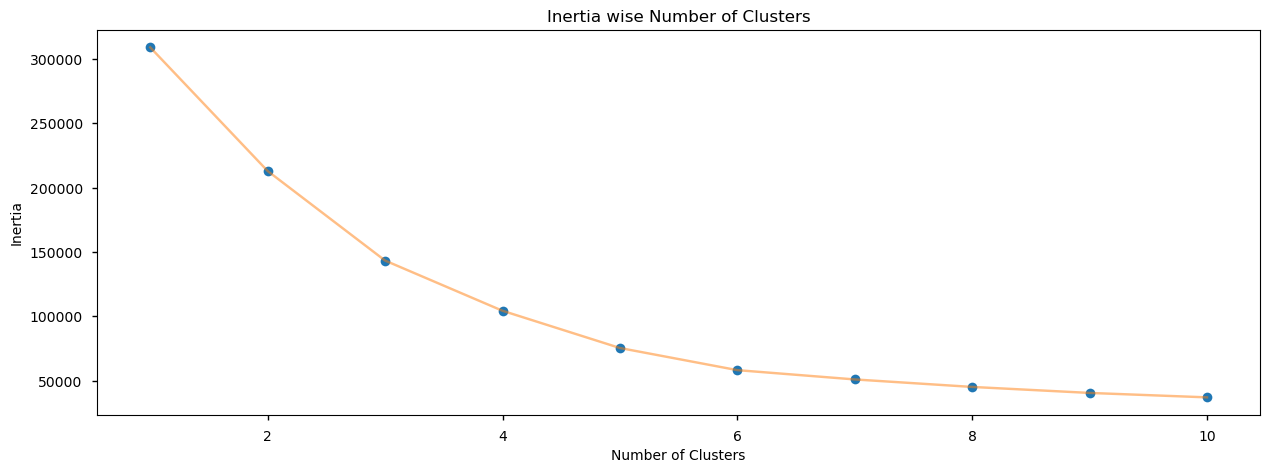

In [398]:
X3 = df[['age', 'spending score (1-100)','annual income (k$)']].values
inertia_list = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, init = 'k-means++'
                   , algorithm = 'elkan', random_state = 11)
    kmeans.fit(X3)
    inertia_list.append(kmeans.inertia_)
    
plt.figure(figsize = (15, 5))
plt.plot(np.arange(1, 11), inertia_list, 'o')
plt.plot(np.arange(1, 11), inertia_list, '-', alpha = .5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Inertia wise Number of Clusters')
plt.show()

In [399]:
kmeans = KMeans(n_clusters = 6, max_iter = 300, init = 'k-means++', n_init = 10
                , algorithm = 'elkan', random_state = 11)
kmeans.fit(X3)
labels3 = kmeans.labels_
centroids3 = kmeans.cluster_centers_

In [400]:
df['label3'] =  labels3
trace1 = go.Scatter3d(
    x= df['age'],
    y= df['spending score (1-100)'],
    z= df['annual income (k$)'],
    mode='markers',
     marker=dict(
        color = df['label3'], 
        size= 20,
        line=dict(
            color= df['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

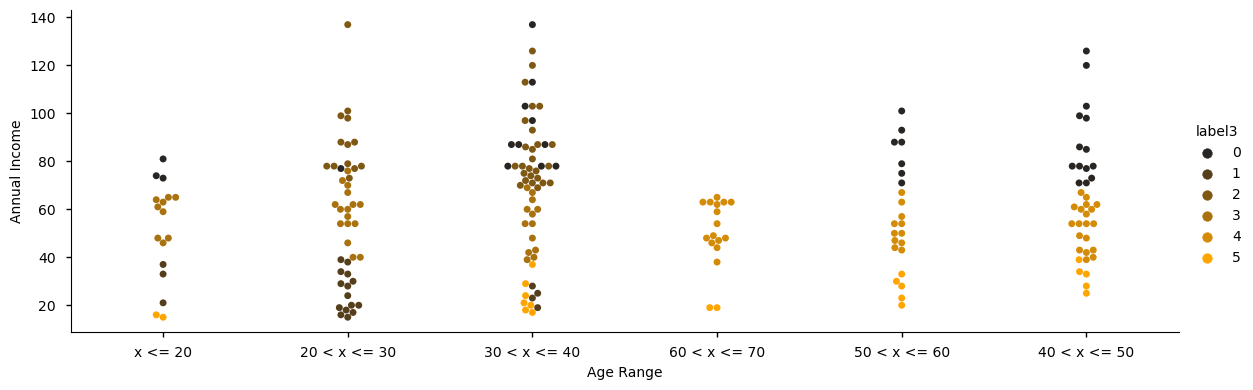

In [431]:
sns.catplot(data = df, x = 'age_range', y = 'annual income (k$)'
            , hue = 'label3', kind = 'swarm', aspect = 3, height = 4, color = 'orange')
plt.xlabel('Age Range')
plt.ylabel('Annual Income')
plt.show()

[UP](#toc)